/home/ruslan/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


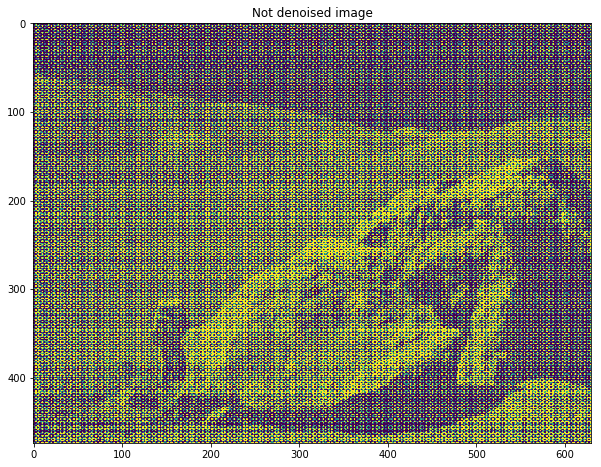

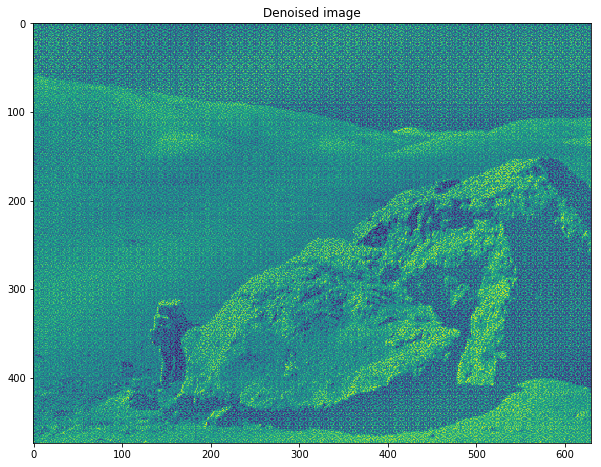

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import fftpack
img = plt.imread('moonlanding.png')
img2_ft = fftpack.fft2(img, axes = (0,1))
mask = [abs(img2_ft) > 3100]
img2_ft[tuple(mask)] = 0
img2 = fftpack.ifft2(img2_ft, axes = (0,1)).real
plt.figure(figsize = [10,15])
plt.imshow(img)
plt.title('Not denoised image')
plt.show()
plt.figure(figsize = [10,15])
plt.imshow(img2)
plt.title('Denoised image')
plt.show()


___Exercise: Curve fitting of temperature data___

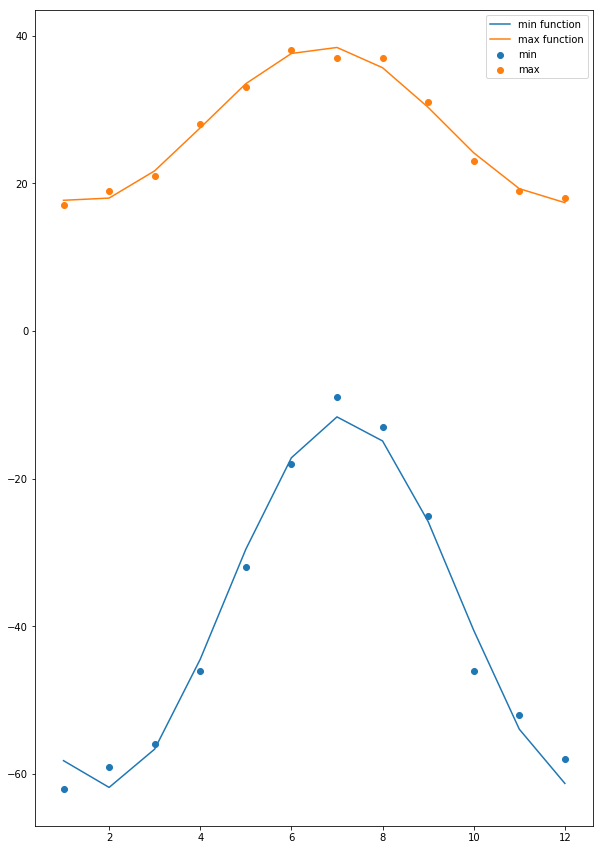

In [13]:
from scipy.optimize import curve_fit
def f(x, a, b, c, d):
    return a * np.cos(b*x + c) + d
max_ = np.array([17, 19, 21, 28, 33, 38, 37,37, 31, 23, 19, 18])
min_ = np.array([-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58])
time = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
guess = [60, 1/4, -6,-60]
params, params_covariance = curve_fit(f, time, min_, guess)
guess = [20, 1/4, -6, 20]
params_, params_covariance_ = curve_fit(f, time, max_, guess)
plt.figure(figsize = [10,15])
plt.scatter(time,min_, label = "min")
plt.plot(time, f(time, params[0],params[1],params[2],params[3]), label = "min function")
plt.scatter(time,max_, label = "max")
plt.plot(time, f(time, params_[0],params_[1],params_[2],params_[3]), label = "max function")
plt.legend()
plt.show()

___Exercise: 2-D minimization___

Global minimum =  [ 0.08985543 -0.71264841] 

Function value =  -1.0316284521568724 



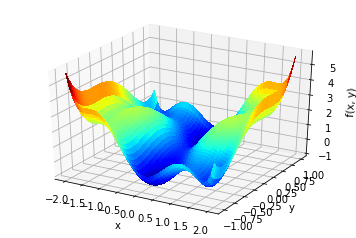

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize

def func(x):
    return (4 - 2.1 *x[0]*x[0]+x[0]*x[0]*x[0]*x[0]/3)*x[0]*x[0] + x[0]*x[1] + (4*x[1]*x[1]-4) * x[1]*x[1]
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, func([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)
rranges = (slice(-2, 2, 0.25), slice(-1, 1, 0.25))
resbrute = optimize.brute(func, rranges, full_output=True, finish=optimize.fmin)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
print("Global minimum = ", resbrute[0], "\n")
print("Function value = ", resbrute[1], "\n")

___Exercise: Probability distributions___

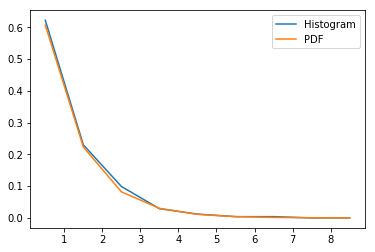

Shape parameter: 0.9794320394008176


In [15]:
from scipy import stats
a = np.random.gamma(t, size=1000)
bins = np.arange(0, 10)
histogram = np.histogram(a, bins=bins, density=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
b = stats.gamma.pdf(bins,1)

plt.plot(bins, histogram, label = 'Histogram')
plt.plot(bins, b, label = 'PDF')
plt.legend()
plt.show()

r = stats.gamma.fit(a,1)
print("Shape parameter:", r[0])

___Exercise: Check that opening amounts to eroding, then dilating.___

In [17]:
from  scipy import ndimage
a = np.zeros((5,5), dtype=np.int)
a[1:4, 1:4] = 1; a[4, 4] = 1; a[0, 0] = 1
print("Matrix")
print(a)

b = ndimage.binary_opening(a).astype(np.int)
print("Opening")
print(b)

b = ndimage.binary_erosion(a).astype(a.dtype)
b = ndimage.binary_dilation(b).astype(a.dtype)
print("Erosion then dilation")
print(b)

Matrix
[[1 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 1]]
Opening
[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 1 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]
Erosion then dilation
[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 1 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]


___Exercise: Check that the area of the reconstructed square is smaller than the area of the initial square.___

In [20]:
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25*np.random.standard_normal(a.shape)
mask = a>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)

900 - np.sum(closed_mask)

17

___1.5.11.13. Maximum wind speed prediction at the Sprogø station___

/home/ruslan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


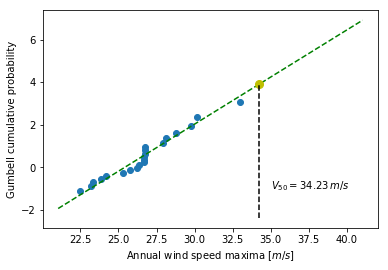

In [24]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import pylab as pl


def gumbell_dist(arr):
    return -np.log(-np.log(arr))

years_nb = 21
wspeeds = np.load('sprog-windspeeds.npy')
max_speeds = np.array([arr.max() for arr in np.array_split(wspeeds, years_nb)])
sorted_max_speeds = np.sort(max_speeds)

cprob = (np.arange(years_nb, dtype=np.float32) + 1)/(years_nb + 1)
gprob = gumbell_dist(cprob)
speed_spline = UnivariateSpline(gprob, sorted_max_speeds, k=1)
nprob = gumbell_dist(np.linspace(1e-3, 1-1e-3, 1e2))
fitted_max_speeds = speed_spline(nprob)

fifty_prob = gumbell_dist(49./50.)
fifty_wind = speed_spline(fifty_prob)

pl.figure()
pl.plot(sorted_max_speeds, gprob, 'o')
pl.plot(fitted_max_speeds, nprob, 'g--')
pl.plot([fifty_wind], [fifty_prob], 'o', ms=8., mfc='y', mec='y')
pl.plot([fifty_wind, fifty_wind], [pl.axis()[2], fifty_prob], 'k--')
pl.text(35, -1, r'$V_{50} = %.2f \, m/s$' % fifty_wind)
pl.xlabel('Annual wind speed maxima [$m/s$]')
pl.ylabel('Gumbell cumulative probability')
pl.show()